In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from __future__ import print_function #adds compatibility with new versions of Python
%matplotlib inline 
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import plotly.express as px

In [2]:
#pip install seaborn

In [3]:
df= pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/HSQ06/CSV/1.0/en')

In [4]:
df.head(5)

STATISTIC         Statistic  TLIST(Q1) Quarter C02343V02817      Area  UNIT  \
0   HSQ06C1  New House Prices      19751  1975Q1            -  National  Euro   
1   HSQ06C1  New House Prices      19751  1975Q1           01    Dublin  Euro   
2   HSQ06C1  New House Prices      19751  1975Q1           02      Cork  Euro   
3   HSQ06C1  New House Prices      19751  1975Q1           03    Galway  Euro   
4   HSQ06C1  New House Prices      19751  1975Q1           04  Limerick  Euro   

     VALUE  
0  11887.0  
1  11858.0  
2  10667.0  
3  13519.0  
4  12565.0

In [5]:
df.dtypes

STATISTIC        object
Statistic        object
TLIST(Q1)         int64
Quarter          object
C02343V02817     object
Area             object
UNIT             object
VALUE           float64
dtype: object

In [6]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "-","--",'nan','NaN']

In [7]:
df= pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/HSQ06/CSV/1.0/en', na_values = missing_value_formats)

In [8]:
print(df.isnull().sum())

STATISTIC         0
Statistic         0
TLIST(Q1)         0
Quarter           0
C02343V02817    336
Area              0
UNIT              0
VALUE            84
dtype: int64


In [9]:
df["Area"].value_counts()

National       336
Waterford      336
Cork           336
Dublin         336
Other areas    336
Galway         336
Limerick       336
Name: Area, dtype: int64

In [10]:
df["Statistic"].value_counts()

Second Hand House Prices    1176
New House Prices            1176
Name: Statistic, dtype: int64

In [11]:
round(df.groupby('Area')['VALUE'].mean().sort_values(ascending=False).iloc[:10],1)

Area
Dublin         182855.2
National       145195.3
Cork           136118.3
Galway         135447.6
Other areas    124764.7
Limerick       119452.5
Waterford      116179.2
Name: VALUE, dtype: float64

In [12]:
df["C02343V02817"].value_counts()

6.0    336
5.0    336
4.0    336
3.0    336
2.0    336
1.0    336
Name: C02343V02817, dtype: int64

In [13]:
df['C02343V02817'].unique()

array([nan,  1.,  2.,  3.,  4.,  5.,  6.])

In [14]:
df

STATISTIC                 Statistic  TLIST(Q1) Quarter  C02343V02817  \
0      HSQ06C1          New House Prices      19751  1975Q1           NaN   
1      HSQ06C1          New House Prices      19751  1975Q1           1.0   
2      HSQ06C1          New House Prices      19751  1975Q1           2.0   
3      HSQ06C1          New House Prices      19751  1975Q1           3.0   
4      HSQ06C1          New House Prices      19751  1975Q1           4.0   
...        ...                       ...        ...     ...           ...   
2347   HSQ06C2  Second Hand House Prices      20164  2016Q4           2.0   
2348   HSQ06C2  Second Hand House Prices      20164  2016Q4           3.0   
2349   HSQ06C2  Second Hand House Prices      20164  2016Q4           4.0   
2350   HSQ06C2  Second Hand House Prices      20164  2016Q4           5.0   
2351   HSQ06C2  Second Hand House Prices      20164  2016Q4           6.0   

             Area  UNIT     VALUE  
0        National  Euro   11887.0  
1          Dublin  Euro   11858.0  
2            Cork  Euro   10667.0  
3          Galway  Euro   13519.0  
4        Limerick  Euro   12565.0  
...           ...   ...       ...  
2347         Cork  Euro  247326.0  
2348       Galway  Euro  218284.0  
2349     Limerick  Euro  195324.0  
2350    Waterford  Euro  183151.0  
2351  Other areas  Euro  207253.0  

[2352 rows x 8 columns]

In [15]:
df=df.rename(columns={"STATISTIC":"HouseCode","Statistic":"HouseType","TLIST(Q1)":"Year/Qua","C02343V02817":"AreaCode","UNIT":"Currency","VALUE":"Price"})

In [16]:
df

HouseCode                 HouseType  Year/Qua Quarter  AreaCode  \
0      HSQ06C1          New House Prices     19751  1975Q1       NaN   
1      HSQ06C1          New House Prices     19751  1975Q1       1.0   
2      HSQ06C1          New House Prices     19751  1975Q1       2.0   
3      HSQ06C1          New House Prices     19751  1975Q1       3.0   
4      HSQ06C1          New House Prices     19751  1975Q1       4.0   
...        ...                       ...       ...     ...       ...   
2347   HSQ06C2  Second Hand House Prices     20164  2016Q4       2.0   
2348   HSQ06C2  Second Hand House Prices     20164  2016Q4       3.0   
2349   HSQ06C2  Second Hand House Prices     20164  2016Q4       4.0   
2350   HSQ06C2  Second Hand House Prices     20164  2016Q4       5.0   
2351   HSQ06C2  Second Hand House Prices     20164  2016Q4       6.0   

             Area Currency     Price  
0        National     Euro   11887.0  
1          Dublin     Euro   11858.0  
2            Cork     Euro   10667.0  
3          Galway     Euro   13519.0  
4        Limerick     Euro   12565.0  
...           ...      ...       ...  
2347         Cork     Euro  247326.0  
2348       Galway     Euro  218284.0  
2349     Limerick     Euro  195324.0  
2350    Waterford     Euro  183151.0  
2351  Other areas     Euro  207253.0  

[2352 rows x 8 columns]

In [17]:
df['Year']=df['Quarter'].str[:-2]

In [18]:
df

HouseCode                 HouseType  Year/Qua Quarter  AreaCode  \
0      HSQ06C1          New House Prices     19751  1975Q1       NaN   
1      HSQ06C1          New House Prices     19751  1975Q1       1.0   
2      HSQ06C1          New House Prices     19751  1975Q1       2.0   
3      HSQ06C1          New House Prices     19751  1975Q1       3.0   
4      HSQ06C1          New House Prices     19751  1975Q1       4.0   
...        ...                       ...       ...     ...       ...   
2347   HSQ06C2  Second Hand House Prices     20164  2016Q4       2.0   
2348   HSQ06C2  Second Hand House Prices     20164  2016Q4       3.0   
2349   HSQ06C2  Second Hand House Prices     20164  2016Q4       4.0   
2350   HSQ06C2  Second Hand House Prices     20164  2016Q4       5.0   
2351   HSQ06C2  Second Hand House Prices     20164  2016Q4       6.0   

             Area Currency     Price  Year  
0        National     Euro   11887.0  1975  
1          Dublin     Euro   11858.0  1975  
2            Cork     Euro   10667.0  1975  
3          Galway     Euro   13519.0  1975  
4        Limerick     Euro   12565.0  1975  
...           ...      ...       ...   ...  
2347         Cork     Euro  247326.0  2016  
2348       Galway     Euro  218284.0  2016  
2349     Limerick     Euro  195324.0  2016  
2350    Waterford     Euro  183151.0  2016  
2351  Other areas     Euro  207253.0  2016  

[2352 rows x 9 columns]

In [19]:
df['AreaCode'].fillna("7", inplace=True)

In [20]:
df

HouseCode                 HouseType  Year/Qua Quarter AreaCode  \
0      HSQ06C1          New House Prices     19751  1975Q1        7   
1      HSQ06C1          New House Prices     19751  1975Q1        1   
2      HSQ06C1          New House Prices     19751  1975Q1        2   
3      HSQ06C1          New House Prices     19751  1975Q1        3   
4      HSQ06C1          New House Prices     19751  1975Q1        4   
...        ...                       ...       ...     ...      ...   
2347   HSQ06C2  Second Hand House Prices     20164  2016Q4        2   
2348   HSQ06C2  Second Hand House Prices     20164  2016Q4        3   
2349   HSQ06C2  Second Hand House Prices     20164  2016Q4        4   
2350   HSQ06C2  Second Hand House Prices     20164  2016Q4        5   
2351   HSQ06C2  Second Hand House Prices     20164  2016Q4        6   

             Area Currency     Price  Year  
0        National     Euro   11887.0  1975  
1          Dublin     Euro   11858.0  1975  
2            Cork     Euro   10667.0  1975  
3          Galway     Euro   13519.0  1975  
4        Limerick     Euro   12565.0  1975  
...           ...      ...       ...   ...  
2347         Cork     Euro  247326.0  2016  
2348       Galway     Euro  218284.0  2016  
2349     Limerick     Euro  195324.0  2016  
2350    Waterford     Euro  183151.0  2016  
2351  Other areas     Euro  207253.0  2016  

[2352 rows x 9 columns]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HouseCode  2352 non-null   object 
 1   HouseType  2352 non-null   object 
 2   Year/Qua   2352 non-null   int64  
 3   Quarter    2352 non-null   object 
 4   AreaCode   2352 non-null   object 
 5   Area       2352 non-null   object 
 6   Currency   2352 non-null   object 
 7   Price      2268 non-null   float64
 8   Year       2352 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 165.5+ KB


In [22]:
print(df.isnull().sum())

HouseCode     0
HouseType     0
Year/Qua      0
Quarter       0
AreaCode      0
Area          0
Currency      0
Price        84
Year          0
dtype: int64


In [23]:
df_corr= df.corr()
df_corr.head()

Year/Qua    Price
Year/Qua   1.00000  0.85662
Price      0.85662  1.00000

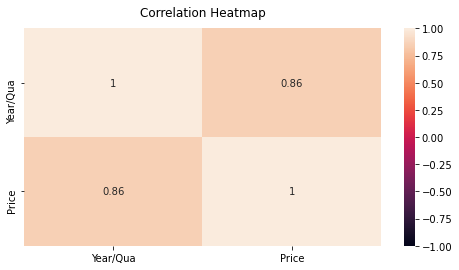

In [24]:
# Increase the size of the heatmap.
plt.figure(figsize=(8, 4))

# Set the range of values to be displayed on the colormap from -1 to 1
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [25]:
df

HouseCode                 HouseType  Year/Qua Quarter AreaCode  \
0      HSQ06C1          New House Prices     19751  1975Q1        7   
1      HSQ06C1          New House Prices     19751  1975Q1        1   
2      HSQ06C1          New House Prices     19751  1975Q1        2   
3      HSQ06C1          New House Prices     19751  1975Q1        3   
4      HSQ06C1          New House Prices     19751  1975Q1        4   
...        ...                       ...       ...     ...      ...   
2347   HSQ06C2  Second Hand House Prices     20164  2016Q4        2   
2348   HSQ06C2  Second Hand House Prices     20164  2016Q4        3   
2349   HSQ06C2  Second Hand House Prices     20164  2016Q4        4   
2350   HSQ06C2  Second Hand House Prices     20164  2016Q4        5   
2351   HSQ06C2  Second Hand House Prices     20164  2016Q4        6   

             Area Currency     Price  Year  
0        National     Euro   11887.0  1975  
1          Dublin     Euro   11858.0  1975  
2            Cork     Euro   10667.0  1975  
3          Galway     Euro   13519.0  1975  
4        Limerick     Euro   12565.0  1975  
...           ...      ...       ...   ...  
2347         Cork     Euro  247326.0  2016  
2348       Galway     Euro  218284.0  2016  
2349     Limerick     Euro  195324.0  2016  
2350    Waterford     Euro  183151.0  2016  
2351  Other areas     Euro  207253.0  2016  

[2352 rows x 9 columns]

In [26]:
df.dtypes

HouseCode     object
HouseType     object
Year/Qua       int64
Quarter       object
AreaCode      object
Area          object
Currency      object
Price        float64
Year          object
dtype: object

In [27]:
df['Year']=df['Year'].astype(int)

In [28]:
df.dtypes

HouseCode     object
HouseType     object
Year/Qua       int64
Quarter       object
AreaCode      object
Area          object
Currency      object
Price        float64
Year           int64
dtype: object

In [29]:
df["Year"].value_counts()

2015    56
1996    56
2012    56
2010    56
2008    56
2006    56
2004    56
2002    56
2000    56
1998    56
1994    56
2013    56
1992    56
1990    56
1988    56
1986    56
1984    56
1982    56
1980    56
1978    56
2014    56
2016    56
1975    56
1977    56
2011    56
2009    56
2007    56
2005    56
2003    56
2001    56
1999    56
1997    56
1995    56
1993    56
1991    56
1989    56
1987    56
1985    56
1983    56
1981    56
1979    56
1976    56
Name: Year, dtype: int64

In [30]:
# load inflation data
inflation = pd.read_excel("data/InflationIndex.xlsx")
# create index multiplier
inflation["index_multiplier"] = inflation["Index"].iloc[-1] / inflation["Index"]

In [31]:
# merge dataframe
df_new = pd.merge(df, inflation, how='left', on='Year')

In [32]:
df_new

HouseCode                 HouseType  Year/Qua Quarter AreaCode  \
0      HSQ06C1          New House Prices     19751  1975Q1        7   
1      HSQ06C1          New House Prices     19751  1975Q1        1   
2      HSQ06C1          New House Prices     19751  1975Q1        2   
3      HSQ06C1          New House Prices     19751  1975Q1        3   
4      HSQ06C1          New House Prices     19751  1975Q1        4   
...        ...                       ...       ...     ...      ...   
2347   HSQ06C2  Second Hand House Prices     20164  2016Q4        2   
2348   HSQ06C2  Second Hand House Prices     20164  2016Q4        3   
2349   HSQ06C2  Second Hand House Prices     20164  2016Q4        4   
2350   HSQ06C2  Second Hand House Prices     20164  2016Q4        5   
2351   HSQ06C2  Second Hand House Prices     20164  2016Q4        6   

             Area Currency     Price  Year  Index  index_multiplier  
0        National     Euro   11887.0  1975  6.367          0.015078  
1          Dublin     Euro   11858.0  1975  6.367          0.015078  
2            Cork     Euro   10667.0  1975  6.367          0.015078  
3          Galway     Euro   13519.0  1975  6.367          0.015078  
4        Limerick     Euro   12565.0  1975  6.367          0.015078  
...           ...      ...       ...   ...    ...               ...  
2347         Cork     Euro  247326.0  2016  0.096          1.000000  
2348       Galway     Euro  218284.0  2016  0.096          1.000000  
2349     Limerick     Euro  195324.0  2016  0.096          1.000000  
2350    Waterford     Euro  183151.0  2016  0.096          1.000000  
2351  Other areas     Euro  207253.0  2016  0.096          1.000000  

[2352 rows x 11 columns]

In [33]:
df_new["CPIAdjPrice"] = df_new["Price"] * df_new["Index"]

In [34]:
df_new.dtypes

HouseCode            object
HouseType            object
Year/Qua              int64
Quarter              object
AreaCode             object
Area                 object
Currency             object
Price               float64
Year                  int64
Index               float64
index_multiplier    float64
CPIAdjPrice         float64
dtype: object

In [35]:
df_new["NewPrice"]= df_new["Price"]+ df_new["CPIAdjPrice"]

In [36]:
df_new

HouseCode                 HouseType  Year/Qua Quarter AreaCode  \
0      HSQ06C1          New House Prices     19751  1975Q1        7   
1      HSQ06C1          New House Prices     19751  1975Q1        1   
2      HSQ06C1          New House Prices     19751  1975Q1        2   
3      HSQ06C1          New House Prices     19751  1975Q1        3   
4      HSQ06C1          New House Prices     19751  1975Q1        4   
...        ...                       ...       ...     ...      ...   
2347   HSQ06C2  Second Hand House Prices     20164  2016Q4        2   
2348   HSQ06C2  Second Hand House Prices     20164  2016Q4        3   
2349   HSQ06C2  Second Hand House Prices     20164  2016Q4        4   
2350   HSQ06C2  Second Hand House Prices     20164  2016Q4        5   
2351   HSQ06C2  Second Hand House Prices     20164  2016Q4        6   

             Area Currency     Price  Year  Index  index_multiplier  \
0        National     Euro   11887.0  1975  6.367          0.015078   
1          Dublin     Euro   11858.0  1975  6.367          0.015078   
2            Cork     Euro   10667.0  1975  6.367          0.015078   
3          Galway     Euro   13519.0  1975  6.367          0.015078   
4        Limerick     Euro   12565.0  1975  6.367          0.015078   
...           ...      ...       ...   ...    ...               ...   
2347         Cork     Euro  247326.0  2016  0.096          1.000000   
2348       Galway     Euro  218284.0  2016  0.096          1.000000   
2349     Limerick     Euro  195324.0  2016  0.096          1.000000   
2350    Waterford     Euro  183151.0  2016  0.096          1.000000   
2351  Other areas     Euro  207253.0  2016  0.096          1.000000   

      CPIAdjPrice    NewPrice  
0       75684.529   87571.529  
1       75499.886   87357.886  
2       67916.789   78583.789  
3       86075.473   99594.473  
4       80001.355   92566.355  
...           ...         ...  
2347    23743.296  271069.296  
2348    20955.264  239239.264  
2349    18751.104  214075.104  
2350    17582.496  200733.496  
2351    19896.288  227149.288  

[2352 rows x 13 columns]

<AxesSubplot:xlabel='NewPrice'>

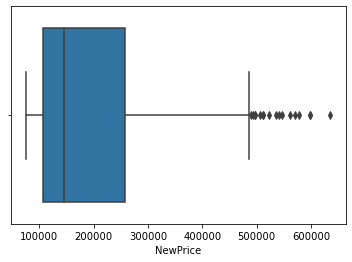

In [37]:
sns.boxplot(x=df_new['NewPrice'])

# 2. General Audience

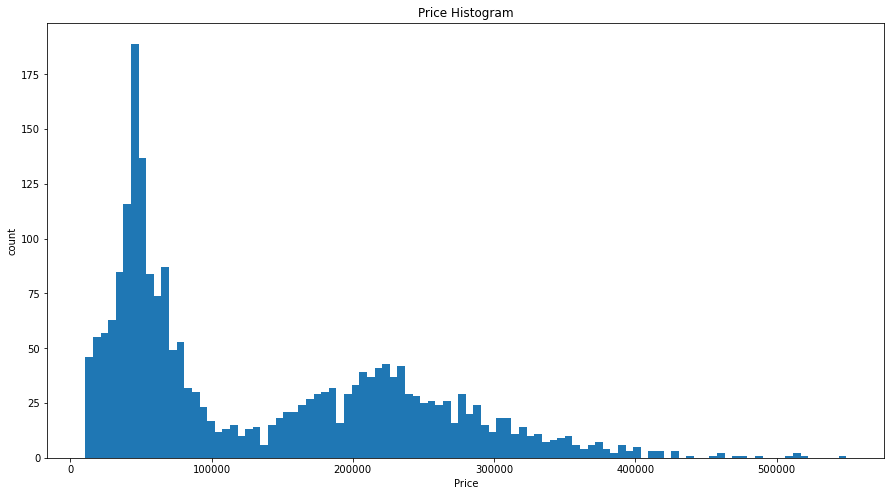

In [38]:
fig1 = plt.figure(figsize=(15,8))
ax1 = plt.subplot()

ax1.hist(x = df_new["Price"],bins = 100)

plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price Histogram")
plt.show()

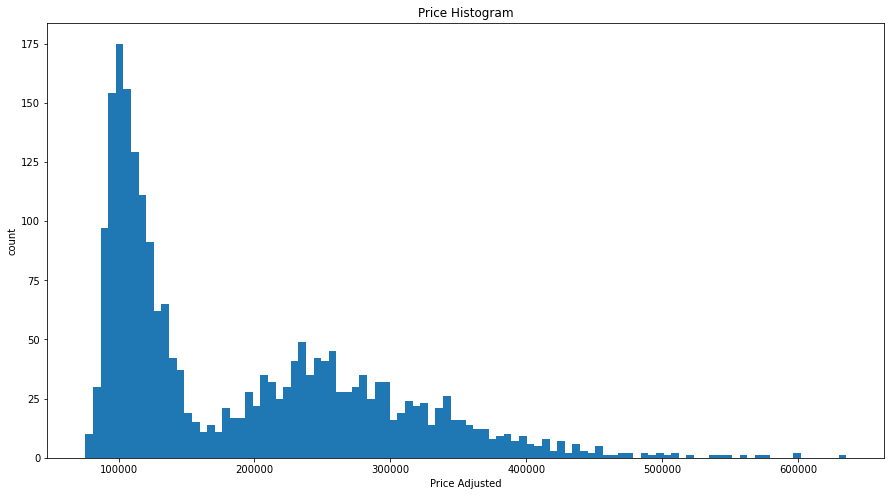

In [39]:
fig1 = plt.figure(figsize=(15,8))
ax1 = plt.subplot()

ax1.hist(x = df_new["NewPrice"],bins = 100)

plt.xlabel("Price Adjusted")
plt.ylabel("count")
plt.title("Price Histogram")
plt.show()

In [40]:
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

formatter = FuncFormatter(currency)

In [41]:
df_sorted=df_new.sort_values("Price",ascending=False)

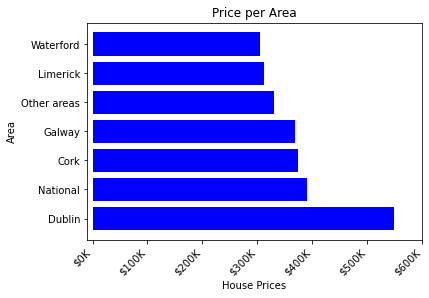

In [42]:
fig, ax = plt.subplots()
ax.barh(df_sorted.Area, df_sorted.Price, color='blue')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 600000], xlabel='House Prices', ylabel='Area',
       title='Price per Area')
ax.xaxis.set_major_formatter(formatter)

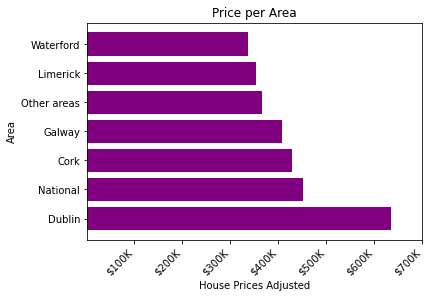

In [43]:
df_sorted1=df_new.sort_values("NewPrice",ascending=False)
fig, ax = plt.subplots()
ax.barh(df_sorted1.Area, df_sorted1.NewPrice, color='Purple')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[1000, 700000], xlabel='House Prices Adjusted', ylabel='Area',
       title='Price per Area')
ax.xaxis.set_major_formatter(formatter)

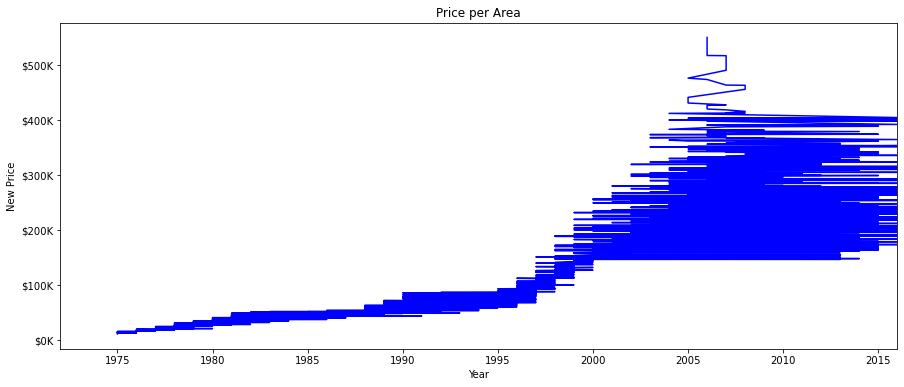

In [44]:
fig= plt.figure(figsize=(15,6))
ax = plt.axes()

ax.plot(df_sorted.Year, df_sorted.Price, color='Blue')
ax.set(xlim=[1972, 2016], xlabel='Year', ylabel='New Price',
       title='Price per Area')
ax.yaxis.set_major_formatter(formatter)

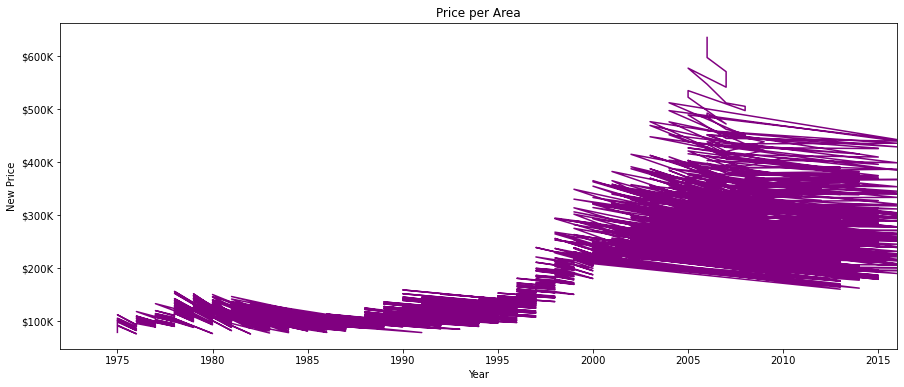

In [45]:
fig= plt.figure(figsize=(15,6))
ax = plt.axes()

ax.plot(df_sorted.Year, df_sorted.NewPrice, color='Purple')
ax.set(xlim=[1972, 2016], xlabel='Year', ylabel='New Price',
       title='Price per Area')
ax.yaxis.set_major_formatter(formatter)

In [46]:
fig = px.bar(df_sorted, x="Area", y="Price", color="HouseType", barmode="group")
fig.show()

In [47]:
fig = px.bar(df_sorted, x="Area", y="NewPrice", color="HouseType", barmode="group")
fig.show()

In [48]:
fig = px.line(df_new, x="Year", y="NewPrice", color='Area', title='Average Price by Area')
fig.show()

In [49]:
df_area= df_new.set_index('Area')

#Checking a particular row
print(df_area.loc['National'])

         HouseCode                 HouseType  Year/Qua Quarter AreaCode  \
Area                                                                      
National   HSQ06C1          New House Prices     19751  1975Q1        7   
National   HSQ06C1          New House Prices     19752  1975Q2        7   
National   HSQ06C1          New House Prices     19753  1975Q3        7   
National   HSQ06C1          New House Prices     19754  1975Q4        7   
National   HSQ06C1          New House Prices     19761  1976Q1        7   
...            ...                       ...       ...     ...      ...   
National   HSQ06C2  Second Hand House Prices     20154  2015Q4        7   
National   HSQ06C2  Second Hand House Prices     20161  2016Q1        7   
National   HSQ06C2  Second Hand House Prices     20162  2016Q2        7   
National   HSQ06C2  Second Hand House Prices     20163  2016Q3        7   
National   HSQ06C2  Second Hand House Prices     20164  2016Q4        7   

         Currency     Pr

In [50]:
fig = px.scatter(df_area, x="Year", y="NewPrice", color= "HouseType", title='Average/National Price')
fig.show()

# 3. Management Team

Text(0.5, 1.0, 'Price vs Year')

<Figure size 432x216 with 0 Axes>

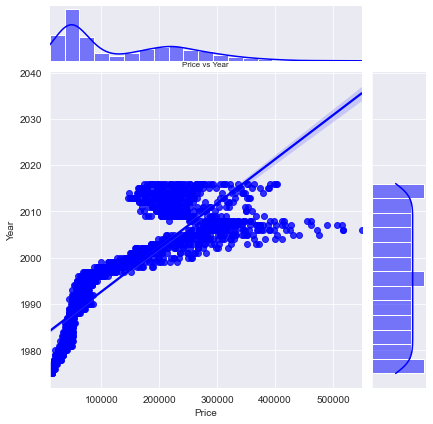

In [51]:
#Scatter plot
#sns.jointplot(x='Abdomen', y='BodyFat', data=dataset, kind='reg', color='orange')

#Changing the size
sns.set_style('darkgrid')
plt.figure(figsize=(6,3))
sns.jointplot(x='Price', y='Year', data=df_new, kind='reg', color='blue')
plt.title('Price vs Year', fontsize=8)

Text(0.5, 1.0, 'Price vs Year')

<Figure size 432x216 with 0 Axes>

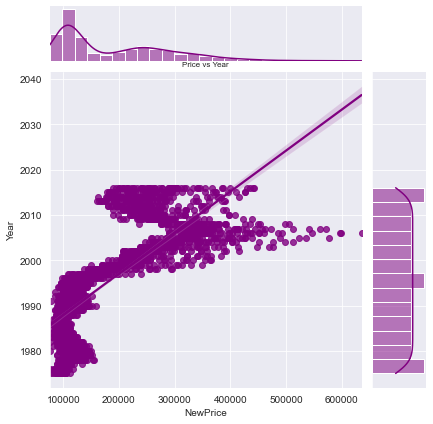

In [52]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,3))
sns.jointplot(x='NewPrice', y='Year', data=df_new, kind='reg', color='purple')
plt.title('Price vs Year', fontsize=8)

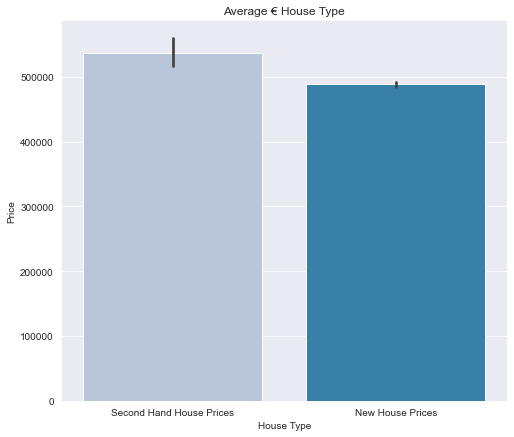

In [53]:
year = df_new.sort_values(by='NewPrice', ascending=False)[['HouseType', 'NewPrice']].drop_duplicates()[:20]
figure = plt.figure(figsize=(8,7))
sns.barplot(y=year.NewPrice, x=year.HouseType, palette='PuBu')
plt.xticks()
plt.xlabel('House Type')
plt.ylabel('Price')
plt.title('Average € House Type')
plt.show()

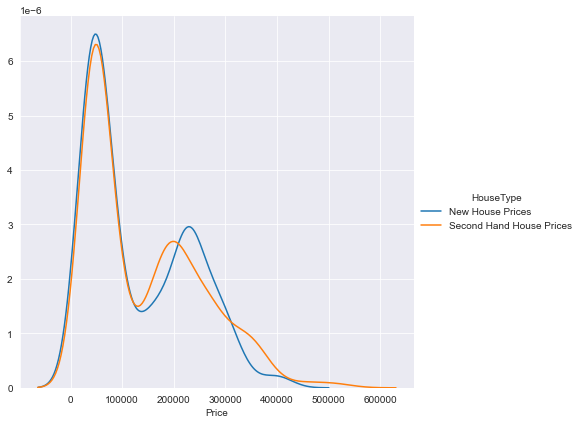

In [54]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(df_new, hue="HouseType", height=6) \
   .map(sns.kdeplot, "Price") \
   .add_legend()

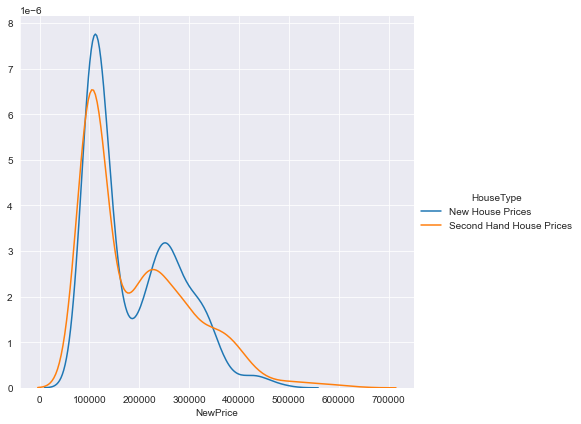

In [55]:
sns.FacetGrid(df_new, hue="HouseType", height=6) \
   .map(sns.kdeplot, "NewPrice") \
   .add_legend()

Text(0.5, 1.0, 'Year vs HouseType')

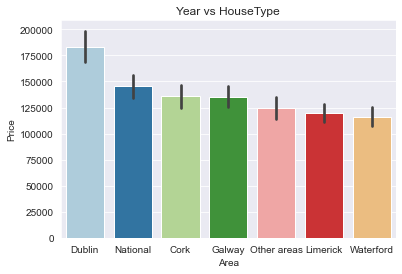

In [56]:
#BAR PLOT

sns.barplot(x='Area', y='Price', data=df_sorted, palette='Paired')
plt.title('Year vs HouseType')

Text(0.5, 1.0, 'House Type vs Price')

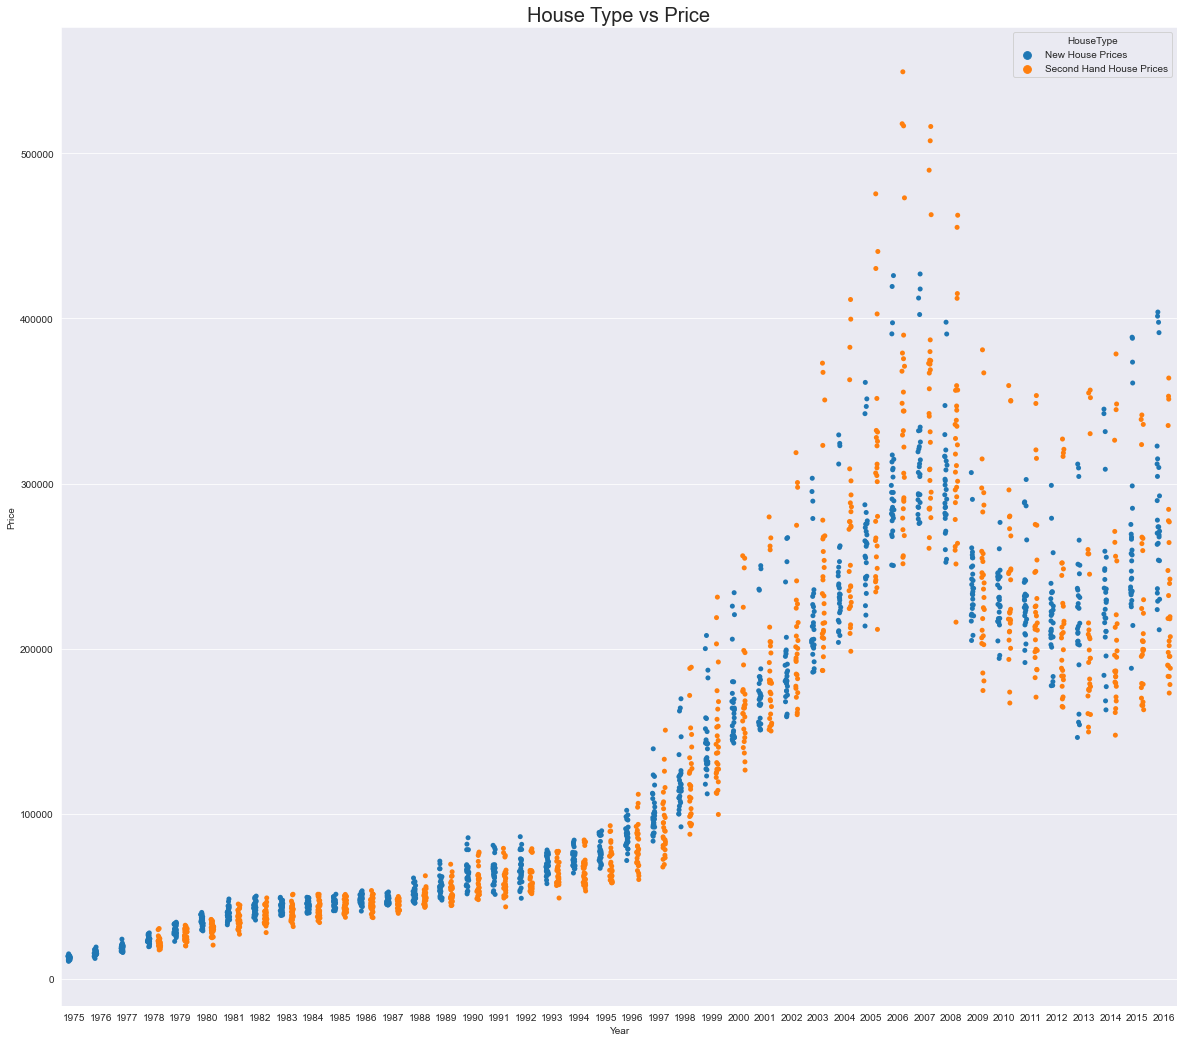

In [57]:
#Strip plot
plt.figure(figsize=(20,18))

sns.stripplot(x='Year', y='Price', data=df_new, jitter=True, hue='HouseType',dodge=True)
plt.title('House Type vs Price', fontsize=20)

Text(0.5, 1.0, 'House Type vs Adjusted Price')

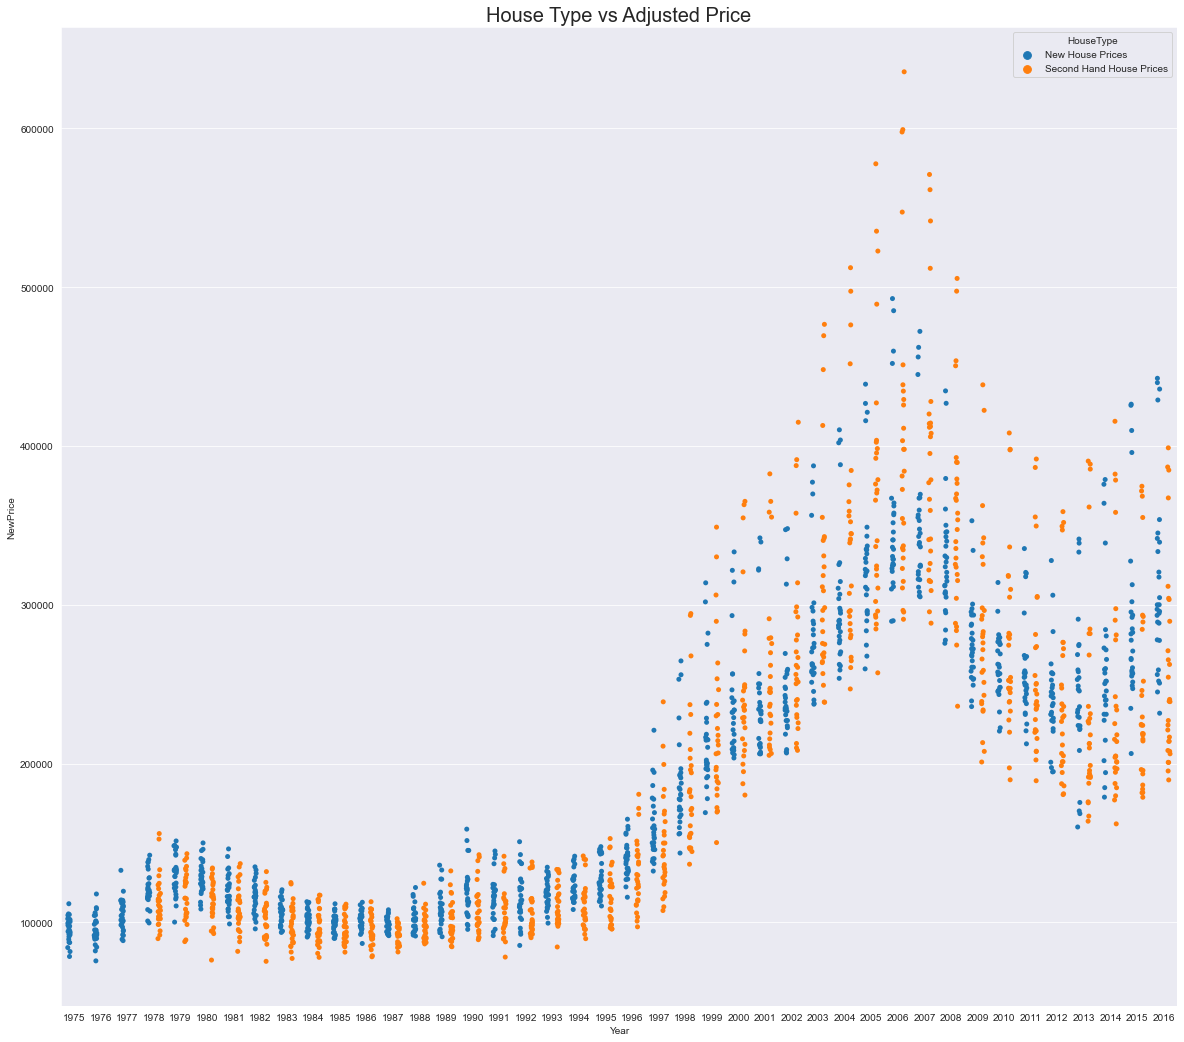

In [58]:
#Strip plot
plt.figure(figsize=(20,18))

sns.stripplot(x='Year', y='NewPrice', data=df_new, jitter=True, hue='HouseType',dodge=True)
plt.title('House Type vs Adjusted Price', fontsize=20)

# 4. Business Intelligence

In [59]:
fig = px.bar(df_new, x="Year", y="Price", color="HouseType", barmode="group", title='Average Price per House Type')
fig.show()

In [60]:
fig = px.bar(df_new, x="Year", y="NewPrice", color="HouseType", barmode="group", title='Average Price per House Type')
fig.show()

In [61]:
# Price grouped by year and area
price_area = df_new.groupby([df_new['Year'], 'Area'])['Price'].mean()
price_area = price_area.reset_index()
price_area

Year         Area       Price
0    1975         Cork   12389.750
1    1975       Dublin   12912.500
2    1975       Galway   14312.250
3    1975     Limerick   13064.750
4    1975     National   12971.250
..    ...          ...         ...
289  2016       Galway  237958.500
290  2016     Limerick  215315.250
291  2016     National  294307.125
292  2016  Other areas  236252.625
293  2016    Waterford  206745.000

[294 rows x 3 columns]

In [62]:
fig = px.bar(df_new, x='Year', y='Price', color='Area', title='Average Price by Time')
fig.show()

In [63]:
fig = px.bar(df_new, x='Year', y='NewPrice', color='Area', title='Average Price by Time')
fig.show()

In [64]:
# Price grouped by year and area
price_area = df_new.groupby([df_new['Year'], 'Area'])['Price'].mean()
price_area = price_area.reset_index()
price_area

Year         Area       Price
0    1975         Cork   12389.750
1    1975       Dublin   12912.500
2    1975       Galway   14312.250
3    1975     Limerick   13064.750
4    1975     National   12971.250
..    ...          ...         ...
289  2016       Galway  237958.500
290  2016     Limerick  215315.250
291  2016     National  294307.125
292  2016  Other areas  236252.625
293  2016    Waterford  206745.000

[294 rows x 3 columns]

In [65]:
fig = px.scatter(df_new, x="Year", y="Price", hover_name="Area", color="HouseType", title='Average Price by House Type')
fig.show()

In [66]:
fig = px.scatter(df_new, x="Year", y="NewPrice", size="Year", color="HouseType", title='Average Price by House Type')
fig.show()

In [67]:
df_new

HouseCode                 HouseType  Year/Qua Quarter AreaCode  \
0      HSQ06C1          New House Prices     19751  1975Q1        7   
1      HSQ06C1          New House Prices     19751  1975Q1        1   
2      HSQ06C1          New House Prices     19751  1975Q1        2   
3      HSQ06C1          New House Prices     19751  1975Q1        3   
4      HSQ06C1          New House Prices     19751  1975Q1        4   
...        ...                       ...       ...     ...      ...   
2347   HSQ06C2  Second Hand House Prices     20164  2016Q4        2   
2348   HSQ06C2  Second Hand House Prices     20164  2016Q4        3   
2349   HSQ06C2  Second Hand House Prices     20164  2016Q4        4   
2350   HSQ06C2  Second Hand House Prices     20164  2016Q4        5   
2351   HSQ06C2  Second Hand House Prices     20164  2016Q4        6   

             Area Currency     Price  Year  Index  index_multiplier  \
0        National     Euro   11887.0  1975  6.367          0.015078   
1          Dublin     Euro   11858.0  1975  6.367          0.015078   
2            Cork     Euro   10667.0  1975  6.367          0.015078   
3          Galway     Euro   13519.0  1975  6.367          0.015078   
4        Limerick     Euro   12565.0  1975  6.367          0.015078   
...           ...      ...       ...   ...    ...               ...   
2347         Cork     Euro  247326.0  2016  0.096          1.000000   
2348       Galway     Euro  218284.0  2016  0.096          1.000000   
2349     Limerick     Euro  195324.0  2016  0.096          1.000000   
2350    Waterford     Euro  183151.0  2016  0.096          1.000000   
2351  Other areas     Euro  207253.0  2016  0.096          1.000000   

      CPIAdjPrice    NewPrice  
0       75684.529   87571.529  
1       75499.886   87357.886  
2       67916.789   78583.789  
3       86075.473   99594.473  
4       80001.355   92566.355  
...           ...         ...  
2347    23743.296  271069.296  
2348    20955.264  239239.264  
2349    18751.104  214075.104  
2350    17582.496  200733.496  
2351    19896.288  227149.288  

[2352 rows x 13 columns]

In [68]:
fig = px.sunburst(df_new, path=['HouseType', 'Area'], values='NewPrice',
                  color='Area', title='Areas by House Type')
fig.show()